In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target
dir(mnist)  # checking the attributes

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

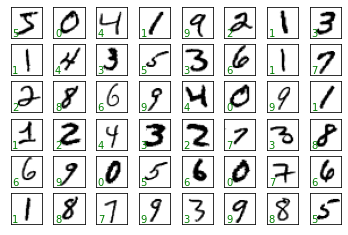

In [ ]:
# To ensure we imported correctly, we plot the image using matplotlib
# The MNIST database contains 70,000 images 
# We are visualizing the first few images

fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))

for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[i].reshape(28, 28), cmap='gray_r')
    axi.text(0.05, 0.05, str(mnist.target[i]),
            transform=axi.transAxes, color='green')

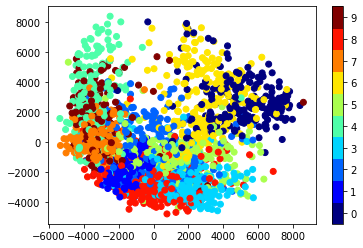

In [ ]:
# A manifold learning algorithm called Isomap os used to transform the date to 2-dimensions
# use only 1/30 of the data

from sklearn.manifold import Isomap

data = x[::30]
target = y[::30]
target = list(map(int, target))

model = Isomap(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

In [ ]:
# Classification on digits
# We split the data into a training and testing set with 80% to 20% ratio

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(x_train.shape, x_test.shape)

(56000, 784) (14000, 784)


In [ ]:
# We normalize the data so that individual samples will have a unit norm.

from sklearn.preprocessing import normalize

x_train = normalize(x_train)
x_test = normalize(x_test)

In [ ]:
# We are using MLPClassifier to implement a MLP algorithm that trains using Backpropagation

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [ ]:
# Training neural network
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.04885856
Iteration 2, loss = 0.94604877
Iteration 3, loss = 0.57655012
Iteration 4, loss = 0.45983004
Iteration 5, loss = 0.40335718
Iteration 6, loss = 0.37078434
Iteration 7, loss = 0.34966819
Iteration 8, loss = 0.33438808
Iteration 9, loss = 0.32269564
Iteration 10, loss = 0.31298776
Iteration 11, loss = 0.30503003
Iteration 12, loss = 0.29841950
Iteration 13, loss = 0.29215499
Iteration 14, loss = 0.28697486
Iteration 15, loss = 0.28177982
Iteration 16, loss = 0.27736711
Iteration 17, loss = 0.27350856
Iteration 18, loss = 0.26947389
Iteration 19, loss = 0.26585033
Iteration 20, loss = 0.26219297
Iteration 21, loss = 0.25915477
Iteration 22, loss = 0.25577344
Iteration 23, loss = 0.25289452
Iteration 24, loss = 0.25023671
Iteration 25, loss = 0.24733354
Iteration 26, loss = 0.24452478
Iteration 27, loss = 0.24214999
Iteration 28, loss = 0.23961321
Iteration 29, loss = 0.23689021
Iteration 30, loss = 0.23479757
Iteration 31, loss = 0.23250691
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [ ]:
# predicting 50 test images
predictions = mlp.predict(x_test)
predictions[:50]

array(['4', '3', '7', '7', '1', '8', '2', '6', '0', '4', '3', '8', '1',
       '0', '6', '2', '6', '5', '7', '3', '8', '1', '1', '5', '0', '5',
       '4', '1', '3', '8', '3', '0', '6', '7', '2', '8', '0', '7', '9',
       '5', '9', '4', '6', '4', '2', '1', '5', '8', '2', '4'], dtype='<U1')

In [ ]:
y_test[:50]  # true labels

array(['4', '3', '7', '7', '1', '8', '2', '6', '0', '4', '3', '8', '1',
       '8', '6', '2', '6', '5', '7', '3', '8', '1', '1', '5', '0', '5',
       '4', '1', '3', '8', '3', '0', '6', '7', '2', '8', '0', '7', '9',
       '5', '9', '4', '6', '4', '2', '1', '5', '8', '2', '4'],
      dtype=object)

In [ ]:
#accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9522142857142857

In [ ]:
# precision

from sklearn.metrics import precision_score
precision_score(y_test, predictions, average='macro')

0.9518562107254466

In [ ]:
# We are using GridSearchCV to find the best parameters for our MLPClassifier.

from sklearn.model_selection import GridSearchCV

mlp_gs = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(10,), (20,), (15,)],
    'activation': ['logistic', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [1e-4, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv =2)
clf.fit(x, y)

GridSearchCV(cv=2, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['lo

In [ ]:
# Checking the best parameter
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
# Checking all results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.873 (+/-0.006) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.885 (+/-0.007) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'adam'}
0.867 (+/-0.027) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.880 (+/-0.007) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.910 (+/-0.000) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.918 (+/-0.004) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
0.913 (+/-0.000) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.918 (+/-0.007) 

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(20,), activation='logistic', alpha=0.05,
                    solver='adam', tol=1e-4, random_state=1,
                    learning_rate='adaptive', verbose=True)
mlp.fit(x_train,y_train)


Iteration 1, loss = 2.13341856
Iteration 2, loss = 1.60307379
Iteration 3, loss = 1.22307024
Iteration 4, loss = 1.01952305
Iteration 5, loss = 0.89427917
Iteration 6, loss = 0.81031233
Iteration 7, loss = 0.75127935
Iteration 8, loss = 0.70854842
Iteration 9, loss = 0.67600109
Iteration 10, loss = 0.65073372
Iteration 11, loss = 0.63075790
Iteration 12, loss = 0.61450174
Iteration 13, loss = 0.60094065
Iteration 14, loss = 0.58963172
Iteration 15, loss = 0.58012234
Iteration 16, loss = 0.57208669
Iteration 17, loss = 0.56498149
Iteration 18, loss = 0.55941421
Iteration 19, loss = 0.55419558
Iteration 20, loss = 0.54965737
Iteration 21, loss = 0.54604826
Iteration 22, loss = 0.54238991
Iteration 23, loss = 0.53961936
Iteration 24, loss = 0.53725336
Iteration 25, loss = 0.53488203
Iteration 26, loss = 0.53291248
Iteration 27, loss = 0.53110662
Iteration 28, loss = 0.52961333
Iteration 29, loss = 0.52824990
Iteration 30, loss = 0.52707769
Iteration 31, loss = 0.52595984
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
# predicting after hyperparameter tuning
guess = mlp.predict(x_test)
guess[:50]

array(['4', '3', '7', '2', '1', '8', '2', '6', '0', '4', '3', '8', '1',
       '5', '6', '2', '6', '5', '7', '3', '5', '1', '1', '5', '0', '5',
       '4', '1', '3', '8', '3', '0', '6', '7', '2', '8', '0', '7', '9',
       '5', '9', '4', '6', '4', '2', '1', '5', '8', '2', '4'], dtype='<U1')

In [ ]:
y_test[:50]  # true labels

array(['4', '3', '7', '7', '1', '8', '2', '6', '0', '4', '3', '8', '1',
       '8', '6', '2', '6', '5', '7', '3', '8', '1', '1', '5', '0', '5',
       '4', '1', '3', '8', '3', '0', '6', '7', '2', '8', '0', '7', '9',
       '5', '9', '4', '6', '4', '2', '1', '5', '8', '2', '4'],
      dtype=object)

In [ ]:
#accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, guess)

0.9168571428571428

In [ ]:
# precision

from sklearn.metrics import precision_score
precision_score(y_test, guess, average='macro')

0.916535117882419

In [ ]:
# We are using GridSearchCV to find the best parameters for our MLPClassifier.

from sklearn.model_selection import GridSearchCV

mlp_gs = MLPClassifier(max_iter=100)
parameters = {'solver': ['adam' ],  
              'alpha': [1e-5, 0.05, 0.001, 0.1], 
              'hidden_layer_sizes': [(5,10,15), (10,15,20), (20,)],
              'activation': ['identity', 'logistic', 'relu'],
              'learning_rate': ['invscaling', 'adaptive'],
              }

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp_gs, parameters, n_jobs=-1, cv =2)
clf.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=2, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'relu'],
                         'alpha': 

In [ ]:
# Checking the best parameter
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (20,), 'learning_rate': 'invscaling', 'solver': 'adam'}


In [ ]:
# Checking all results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.880 (+/-0.016) for {'activation': 'identity', 'alpha': 1e-05, 'hidden_layer_sizes': (5, 10, 15), 'learning_rate': 'invscaling', 'solver': 'adam'}
0.879 (+/-0.006) for {'activation': 'identity', 'alpha': 1e-05, 'hidden_layer_sizes': (5, 10, 15), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.902 (+/-0.006) for {'activation': 'identity', 'alpha': 1e-05, 'hidden_layer_sizes': (10, 15, 20), 'learning_rate': 'invscaling', 'solver': 'adam'}
0.907 (+/-0.005) for {'activation': 'identity', 'alpha': 1e-05, 'hidden_layer_sizes': (10, 15, 20), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.902 (+/-0.009) for {'activation': 'identity', 'alpha': 1e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'invscaling', 'solver': 'adam'}
0.907 (+/-0.007) for {'activation': 'identity', 'alpha': 1e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.885 (+/-0.010) for {'activation': 'identity', 'alpha': 0.05, 'hidden_layer_sizes': (5, 10, 15), 'learning_rate': 'invscaling',

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(20,), activation='relu', alpha=0.1,
                    solver='adam', tol=1e-4, random_state=1,
                    learning_rate='invscaling', verbose=True)
mlp.fit(x_train,y_train)

Iteration 1, loss = 1.57913262
Iteration 2, loss = 0.78450281
Iteration 3, loss = 0.60221610
Iteration 4, loss = 0.53301778
Iteration 5, loss = 0.49898552
Iteration 6, loss = 0.47859357
Iteration 7, loss = 0.46456572
Iteration 8, loss = 0.45433954
Iteration 9, loss = 0.44593451
Iteration 10, loss = 0.43928068
Iteration 11, loss = 0.43379790
Iteration 12, loss = 0.42910487
Iteration 13, loss = 0.42488507
Iteration 14, loss = 0.42114580
Iteration 15, loss = 0.41795902
Iteration 16, loss = 0.41511360
Iteration 17, loss = 0.41233610
Iteration 18, loss = 0.41042362
Iteration 19, loss = 0.40841453
Iteration 20, loss = 0.40636091
Iteration 21, loss = 0.40503080
Iteration 22, loss = 0.40312710
Iteration 23, loss = 0.40188630
Iteration 24, loss = 0.40078091
Iteration 25, loss = 0.39958616
Iteration 26, loss = 0.39847349
Iteration 27, loss = 0.39726095
Iteration 28, loss = 0.39639425
Iteration 29, loss = 0.39545523
Iteration 30, loss = 0.39457720
Iteration 31, loss = 0.39377390
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
guess = mlp.predict(x_test)
#accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, guess)

0.9439285714285715

In [ ]:
# precision

from sklearn.metrics import precision_score
precision_score(y_test, guess, average='macro')

0.9436769196253184